# GOOGLE STOCK PREDICTION

In this project I have tried to bulid an LSTM model for the prediction of the Google stock values.I have trained the model on the data from 1-3-2012 to 12-30-2016 and predicted the values on the date 29-08-2018 the model predicts the price of stocks using a machine learning technique called Long Short-Term Memory (LSTM). 

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video). 

This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Google.) using the past 60 day stock price.

## IMPORTING THE LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## UPLOADING THE DATA ON TO THE GOOGLE DRIVE

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv
Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


## LOADING THE DATA AS TEST AND TRAIN DATA

In [4]:
import io
test_data = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Test.csv']))
train_data = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Train.csv']))

## EDA

View thw few rows at top and end of the train_data set

In [5]:
train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
train_data.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


View thw few rows at top and end of the test_data set

In [7]:
test_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [8]:
test_data.tail()

,Date,Open,High,Low,Close,Volume
15,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
16,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
17,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
18,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"
19,1/31/2017,796.86,801.25,790.52,796.79,"2,160,600"


Print the shape of the train_data and test_data

In [9]:
print('train_data shape:{}'.format(train_data.shape))
print('test_data shape:{}'.format(test_data.shape))

train_data shape:(1258, 6)
test_data shape:(20, 6)


Checking for Null values

In [10]:
train_data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

The above shows that there is no null value in the train_data

Concise summary of train_data.

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


concise summary of test_data.

In [12]:
train_data.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


View the distribution of the train_data

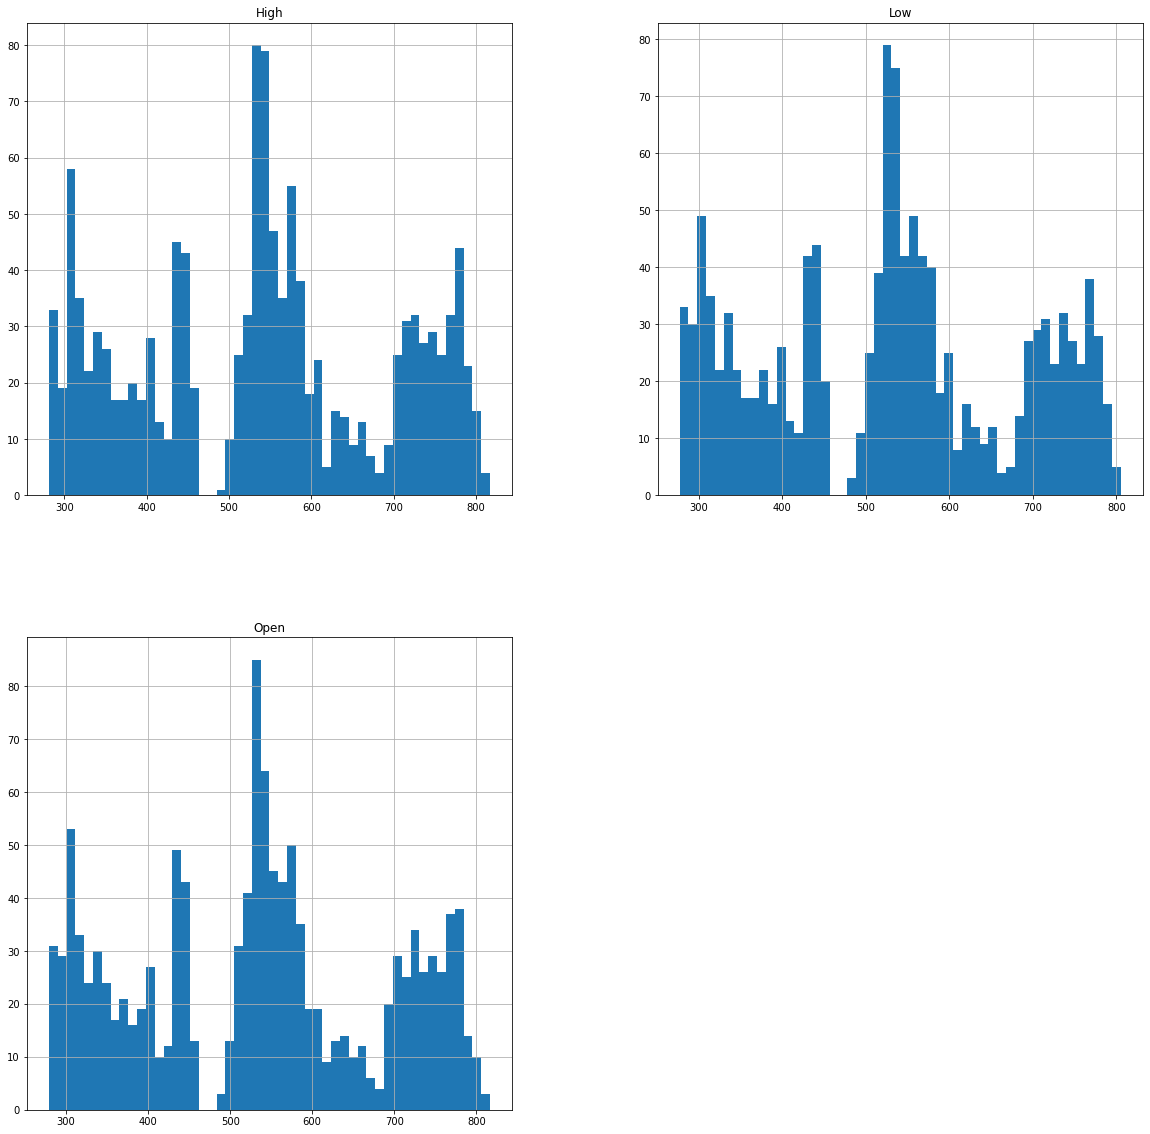

In [13]:
train_data.hist(figsize=(20,20),bins=50);

Plotting the open values of the train_data

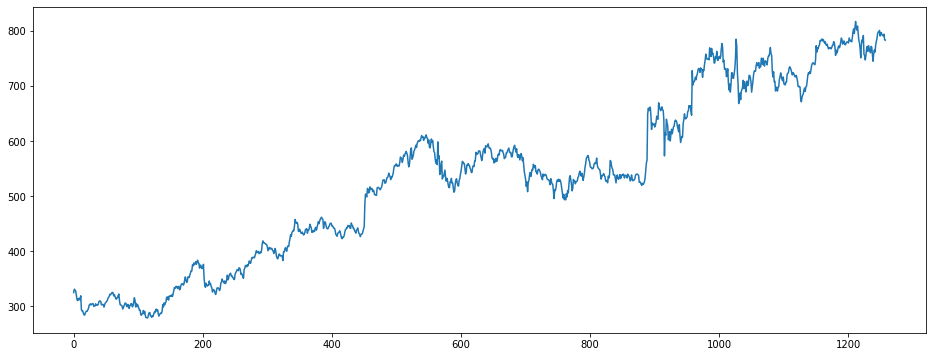

In [14]:
train_data['Open'].plot(figsize=(16,6))

Plotting the open values of the test_data

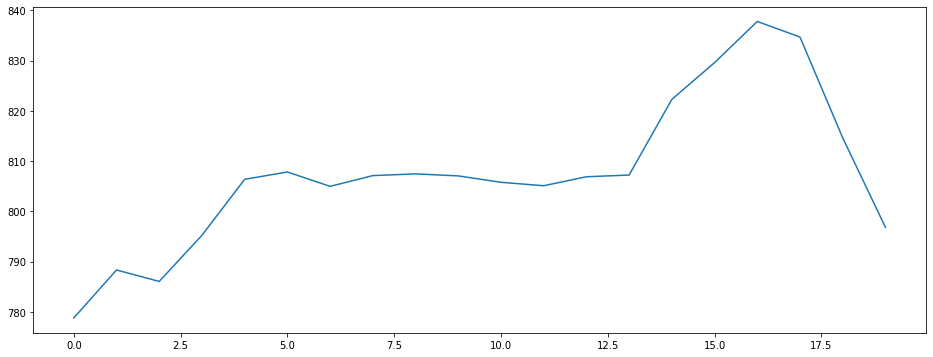

In [15]:
test_data['Open'].plot(figsize=(16,6))

Since the features Close and Volume of the train_data and volume of the test data is of object type we convert it to float for further steps

In [16]:
train_data["Close"] = train_data["Close"].str.replace(',', '').astype(float)

In [17]:
train_data["Volume"]=train_data["Volume"].str.replace(',','').astype(float)

In [18]:
test_data["Volume"]=test_data["Volume"].str.replace(',','').astype(float)

Checking the results of the above operation

In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB


Plotting the Close values of the train_data

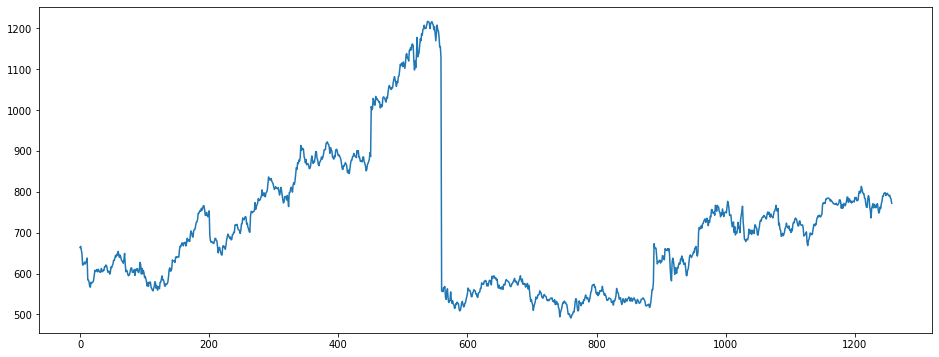

In [21]:
train_data["Close"].plot(figsize=(16,6))

Plotting the Close values of the test_data

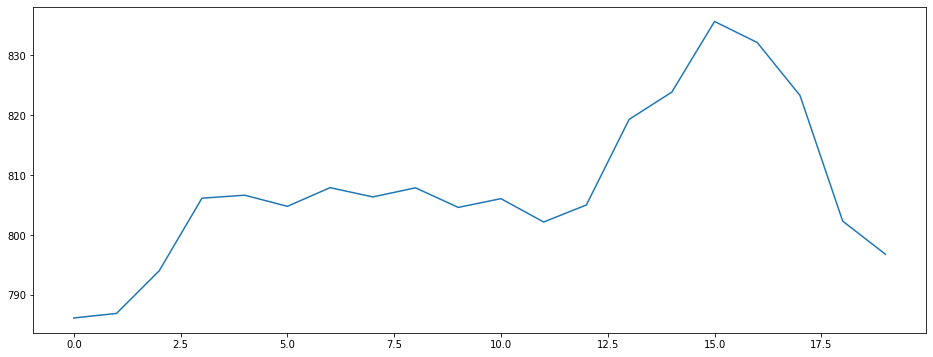

In [22]:
test_data["Close"].plot(figsize=(16,6))

In [23]:
train_data_close=train_data['Close']
train_data_close

0       663.59
1       666.45
2       657.21
3       648.24
4       620.76
         ...  
1253    789.91
1254    791.55
1255    785.05
1256    782.79
1257    771.82
Name: Close, Length: 1258, dtype: float64

In [24]:
test_data_close=test_data['Close']
test_data_close

0     786.14
1     786.90
2     794.02
3     806.15
4     806.65
5     804.79
6     807.91
7     806.36
8     807.88
9     804.61
10    806.07
11    802.17
12    805.02
13    819.31
14    823.87
15    835.67
16    832.15
17    823.31
18    802.32
19    796.79
Name: Close, dtype: float64

Now scale the data set to be values between 0 and 1 inclusive, I do this because it is generally good practice to scale your data before giving it to the neural network.

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_data_close=scaler.fit_transform(np.array(train_data_close).reshape(-1,1))
test_data_close=scaler.fit_transform(np.array(test_data_close).reshape(-1,1))


Checking the scaling 

In [26]:
train_data_close

array([[0.23757287],
       [0.24151427],
       [0.22878051],
       ...,
       [0.40495845],
       [0.40184391],
       [0.38672602]])

In [27]:
test_data_close

array([[0.        ],
       [0.01534424],
       [0.1590955 ],
       [0.40399758],
       [0.41409247],
       [0.37653947],
       [0.4395316 ],
       [0.40823743],
       [0.4389259 ],
       [0.37290531],
       [0.40238239],
       [0.32364224],
       [0.38118312],
       [0.66969513],
       [0.76176055],
       [1.        ],
       [0.92893196],
       [0.75045427],
       [0.3266707 ],
       [0.2150212 ]])

Train validation set split

In [28]:
train_size=(round(len(train_data_close)*0.80))
valid_size=len(train_data_close)-train_size
train,valid=train_data_close[0:train_size,:],train_data_close[train_size:len(train_data_close),:1]

Train validation set shape

In [29]:
print('train shape:{}'.format(train.shape))
print('valid shape:{}'.format(valid.shape))

train shape:(1006, 1)
valid shape:(252, 1)


In [30]:
training_data_len=len(train_data_close)

In [31]:
training_data_len

1258

splitting Traning and validation set into training and validation features and labels

In [32]:
def create_dataset(dataset,time_stamp=1):
  dataX,datay=[],[]
  for i in range(len(dataset)-time_step-1):
      a = dataset[i:(i+time_step), 0]   
      dataX.append(a)
      datay.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(datay)

In [33]:
time_step = 60
X_train, y_train = create_dataset(train, time_step)
X_valid, y_valid = create_dataset(valid, time_step)

In [34]:
print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_train shape:{}'.format(X_train.shape))
print('y_valid shape:{}'.format(y_valid.shape))


X_train shape:(945, 60)
y_train shape:(945,)
X_train shape:(945, 60)
y_valid shape:(191,)


In [35]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_valid = X_valid.reshape(X_valid.shape[0],X_valid.shape[1] , 1)

In [36]:
print('X_train shape:{}'.format(X_train.shape))
print('X_train shape:{}'.format(X_train.shape))


X_train shape:(945, 60, 1)
X_train shape:(945, 60, 1)


## MODEL

Build the LSTM model to have four LSTM layers with 50 neurons and four Dropout layers, one with 1 neurons.

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


In [38]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [39]:
regressor.compile(loss='mean_squared_error',optimizer='adam')


In [40]:
regressor.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=100,batch_size=64)


Epoch 1/100
15/15 [==============================] - 3s 229ms/step - loss: 0.0508 - val_loss: 0.0163
Epoch 2/100
15/15 [==============================] - 2s 137ms/step - loss: 0.0205 - val_loss: 0.0030
Epoch 3/100
15/15 [==============================] - 2s 136ms/step - loss: 0.0141 - val_loss: 0.0025
Epoch 4/100
15/15 [==============================] - 2s 145ms/step - loss: 0.0132 - val_loss: 0.0014
Epoch 5/100
15/15 [==============================] - 2s 139ms/step - loss: 0.0114 - val_loss: 0.0017
Epoch 6/100
15/15 [==============================] - 2s 136ms/step - loss: 0.0094 - val_loss: 0.0013
Epoch 7/100
15/15 [==============================] - 2s 138ms/step - loss: 0.0101 - val_loss: 0.0017
Epoch 8/100
15/15 [==============================] - 2s 137ms/step - loss: 0.0096 - val_loss: 0.0012
Epoch 9/100
15/15 [==============================] - 2s 139ms/step - loss: 0.0088 - val_loss: 0.0032
Epoch 10/100
15/15 [==============================] - 2s 137ms/step - loss: 0.0074 - val_lo

## TESTING DATA SET

Concatenate the train_data_close test_data_close

selecting the roes from training_data_len-60 to the end all columns 

In [41]:
dataset=pd.concat((pd.DataFrame(train_data_close),pd.DataFrame(test_data_close)),axis=0)
dataset=np.array(dataset)
inputs=dataset[training_data_len-60:, :]

In [42]:
len(dataset)

1278

In [43]:
len(inputs)

80

In [44]:
inputs

array([[0.39367171],
       [0.39121867],
       [0.40618497],
       [0.40222979],
       [0.40646059],
       [0.3955046 ],
       [0.39597315],
       [0.39794386],
       [0.41902898],
       [0.42762841],
       [0.42138555],
       [0.42469303],
       [0.4436283 ],
       [0.43613136],
       [0.42427959],
       [0.41915301],
       [0.41918057],
       [0.40425561],
       [0.40297397],
       [0.38242631],
       [0.3733721 ],
       [0.37322051],
       [0.40147182],
       [0.41248295],
       [0.40531676],
       [0.37396469],
       [0.36219561],
       [0.33747227],
       [0.36835577],
       [0.37661067],
       [0.38591293],
       [0.3711809 ],
       [0.38311536],
       [0.38183372],
       [0.37180106],
       [0.37275195],
       [0.38179237],
       [0.38537547],
       [0.36773562],
       [0.35378912],
       [0.35734465],
       [0.37390957],
       [0.3692102 ],
       [0.38585781],
       [0.39306534],
       [0.41080165],
       [0.41077409],
       [0.420

Spliting the data set into X_test features y_test labels 

In [45]:
data=pd.concat((train_data,test_data),axis=0)
data=data.filter(['Close'])
X_test = []
y_test=data[training_data_len:]
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i])


Concatenate the train_data test_data

In [46]:
df=pd.concat((train_data,test_data),axis=0).filter(['Close','Date'])
df['Date'] = pd.to_datetime(df.Date) 

In [47]:
df

,Close,Date
0,663.59,2012-01-03
1,666.45,2012-01-04
2,657.21,2012-01-05
3,648.24,2012-01-06
4,620.76,2012-01-09
...,...,...
15,835.67,2017-01-25
16,832.15,2017-01-26
17,823.31,2017-01-27
18,802.32,2017-01-30


In [48]:
pd.DataFrame(data)

,Close
0,663.59
1,666.45
2,657.21
3,648.24
4,620.76
...,...
15,835.67
16,832.15
17,823.31
18,802.32


In [49]:
len(X_test)

20

In [50]:
training_data_len

1258

In [51]:
X_test=np.array(X_test)

In [52]:
X_test

array([[[0.39367171],
        [0.39121867],
        [0.40618497],
        ...,
        [0.40495845],
        [0.40184391],
        [0.38672602]],

       [[0.39121867],
        [0.40618497],
        [0.40222979],
        ...,
        [0.40184391],
        [0.38672602],
        [0.        ]],

       [[0.40618497],
        [0.40222979],
        [0.40646059],
        ...,
        [0.38672602],
        [0.        ],
        [0.01534424]],

       ...,

       [[0.40425561],
        [0.40297397],
        [0.38242631],
        ...,
        [0.76176055],
        [1.        ],
        [0.92893196]],

       [[0.40297397],
        [0.38242631],
        [0.3733721 ],
        ...,
        [1.        ],
        [0.92893196],
        [0.75045427]],

       [[0.38242631],
        [0.3733721 ],
        [0.37322051],
        ...,
        [0.92893196],
        [0.75045427],
        [0.3266707 ]]])

In [53]:
X_test.shape

(20, 60, 1)

Reshape the data set for LSTM

In [54]:
X_test=np.reshape(X_test,(X_test.shape[0],X_train.shape[1],1))

In [55]:
y_test=np.array(y_test)

In [56]:
y_test

array([[786.14],
       [786.9 ],
       [794.02],
       [806.15],
       [806.65],
       [804.79],
       [807.91],
       [806.36],
       [807.88],
       [804.61],
       [806.07],
       [802.17],
       [805.02],
       [819.31],
       [823.87],
       [835.67],
       [832.15],
       [823.31],
       [802.32],
       [796.79]])

Fit the data set into LSTM model

The output of the LSTM mdoel is saved into predictions and inverse_transform of the predictions and saved into predictions

In [57]:
predictions=regressor.predict(X_test)
predictions=scaler.inverse_transform(predictions)

In [58]:
predictions

array([[805.99133],
       [803.57513],
       [799.44495],
       [795.73   ],
       [794.2263 ],
       [794.99225],
       [797.228  ],
       [800.2991 ],
       [803.42615],
       [806.0894 ],
       [807.6106 ],
       [807.96265],
       [807.06104],
       [805.69543],
       [806.1661 ],
       [809.4334 ],
       [816.3256 ],
       [825.3016 ],
       [832.0774 ],
       [828.4896 ]], dtype=float32)

In [59]:
y_test

array([[786.14],
       [786.9 ],
       [794.02],
       [806.15],
       [806.65],
       [804.79],
       [807.91],
       [806.36],
       [807.88],
       [804.61],
       [806.07],
       [802.17],
       [805.02],
       [819.31],
       [823.87],
       [835.67],
       [832.15],
       [823.31],
       [802.32],
       [796.79]])

Get the root mean squared error (RMSE), which is a good measure of how accurate the model is. A value of 0 would indicate that the models predicted values match the actual values from the test data set perfectly.
The lower the value the better the model performed. But usually it is best to use other metrics as well to truly get an idea of how well the model performed.

In [60]:
rsme=np.sqrt(np.mean(predictions-y_test)**2)
rsme

0.5481981201171721

## PLOTTING THE PREDICITION 

In [61]:
training=pd.DataFrame(df[:training_data_len])
testing=pd.DataFrame(df[training_data_len:])
testing['predictions']=predictions

In [62]:
testing.shape

(20, 3)

In [63]:
testing

,Close,Date,predictions
0,786.14,2017-01-03,805.991333
1,786.90,2017-01-04,803.575134
2,794.02,2017-01-05,799.444946
3,806.15,2017-01-06,795.729980
4,806.65,2017-01-09,794.226318
5,804.79,2017-01-10,794.992249
6,807.91,2017-01-11,797.228027
7,806.36,2017-01-12,800.299072
8,807.88,2017-01-13,803.426147
9,804.61,2017-01-17,806.089417


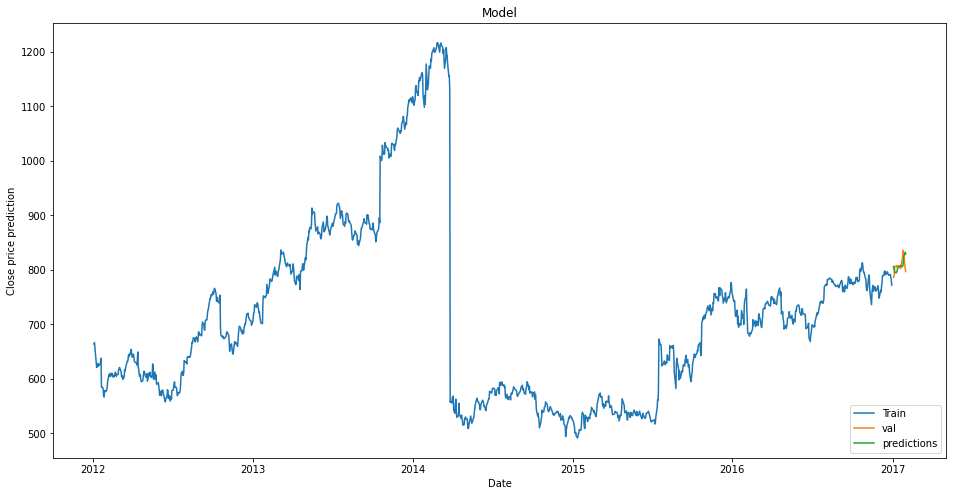

In [64]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel("Date")
plt.ylabel("Close price prediction")
plt.plot(training['Date'],training['Close'])
plt.plot(testing['Date'],testing[['Close','predictions']])
plt.legend(['Train','val','predictions'],loc="lower right")
plt.show()

The predictions and Train plots have been plotted and its looks to be close

## PREDICTING THE STOCK CLOSING ON 2018-08-29

Loading the dataset into google drive

In [65]:
uploaded = files.upload()


Saving Google_test.csv to Google_test.csv


Loading the data 

In [66]:
import io
google= pd.read_csv(io.BytesIO(uploaded['Google_test.csv']))


## EDA

In [67]:
google.shape

(2335, 7)

In [68]:
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [69]:
google.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2330,2018-08-23,1219.880005,1235.170044,1219.349976,1221.160034,1221.160034,1233300
2331,2018-08-24,1226.000000,1237.400024,1221.420044,1236.750000,1236.750000,1222700
2332,2018-08-27,1244.140015,1257.869995,1240.680054,1256.270020,1256.270020,1429000
2333,2018-08-28,1255.900024,1256.560059,1242.969971,1245.859985,1245.859985,1366500
2334,2018-08-29,1255.000000,1267.170044,1252.800049,1264.650024,1264.650024,1846300


Converting the date to standard form

In [70]:
google['Date'] = pd.to_datetime(google['Date'])

In [71]:
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


Selecting the rows between 2017-01-01 and 2018-08-29

In [72]:
start_date = '2017-01-01'
end_date = '2018-08-29'

In [73]:
google=google[google.Date.between(start_date,end_date)]

In [74]:
google.shape

(418, 7)

In [75]:
google.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2330,2018-08-23,1219.880005,1235.170044,1219.349976,1221.160034,1221.160034,1233300
2331,2018-08-24,1226.000000,1237.400024,1221.420044,1236.750000,1236.750000,1222700
2332,2018-08-27,1244.140015,1257.869995,1240.680054,1256.270020,1256.270020,1429000
2333,2018-08-28,1255.900024,1256.560059,1242.969971,1245.859985,1245.859985,1366500
2334,2018-08-29,1255.000000,1267.170044,1252.800049,1264.650024,1264.650024,1846300


I want to test the model some more and get the predicted closing price value of Googlefor 2018-08-29.

convert the data to an array that contains only the closing price. Then I will get the last 60 day closing price and scale the data to be values between 0 and 1 inclusive.

After that I will create an empty list and append the past 60 day price to it, and then convert it to a numpy array and reshape it so that I can input the data into the model.

Last but not least, I will input the data into the model and get the predicted price.

In [76]:
google_close=google.filter(['Close'])
last_60_days=google_close[-61:]
last_60_days=last_60_days.drop([2334],axis=0)
last_60_days_scaled=scaler.fit_transform(last_60_days)

In [77]:
X_test_google=[]
X_test_google.append(last_60_days_scaled)
X_test_google=np.array(X_test_google)
X_test_google=np.reshape(X_test_google,(X_test_google.shape[0],X_test_google.shape[1],1))

In [78]:
X_test_google.shape

(1, 60, 1)

Predicting the values 2018-08-29

In [79]:
pred_price=regressor.predict(X_test_google)
pred_price=scaler.inverse_transform(pred_price)
pred_price

array([[1240.111]], dtype=float32)

In [84]:
google_close[-1:]

,Close
2334,1264.650024


The predicted values and the real value are round about same